In [35]:
#Using Google Colab Notebook to run .ipynb files

!pip install investpy #Installing library to Fetch Data
!pip install yfinance #Installing library to Fetch Date
!pip install kats     #Install KATS Library
# !pip install --upgrade pip

In [36]:
#!pip install auto-ts  #It will install AUTO TS library , commented out as we are using KATS Forecasting library

In [91]:
#import libraries
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt
import warnings
from kats.consts import TimeSeriesData #already has lstm, and maybe all models
# from auto_ts import auto_timeseries #another auto ensembler

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import seaborn as sns
import investpy
from datetime import date
import plotly.graph_objects as go
import math
import yfinance as yf
import plotly.io as pio



##NIFTY 50 Forecasting Data



In [92]:
#Extracting Last 1 year data of NF using investpy library 
today = datetime.now()
today = today.strftime("%d/%m/%Y")
one_year= datetime.today() - timedelta(days=370)
one_year = one_year.strftime("%d/%m/%Y")

df = investpy.get_index_historical_data(index="Nifty 50",country="India",from_date=str(one_year),to_date= str(today))
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-05-11,14789.70,14900.00,14771.40,14850.75,616204468224,INR
2021-05-12,14823.55,14824.05,14649.70,14696.50,620318228480,INR
2021-05-14,14749.40,14749.65,14591.90,14677.80,602738589696,INR
2021-05-17,14756.25,14938.00,14725.35,14923.15,534516170752,INR
2021-05-18,15067.20,15137.25,15043.70,15108.10,571923103744,INR


In [93]:
df.index

DatetimeIndex(['2021-05-11', '2021-05-12', '2021-05-14', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25',
               ...
               '2022-05-02', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [94]:
df.reset_index(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      252 non-null    datetime64[ns]
 1   Open      252 non-null    float64       
 2   High      252 non-null    float64       
 3   Low       252 non-null    float64       
 4   Close     252 non-null    float64       
 5   Volume    252 non-null    int64         
 6   Currency  252 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 13.9+ KB


In [95]:
df_close = df[["Date","Close"]]
df_close

,Date,Close
0,2021-05-11,14850.75
1,2021-05-12,14696.50
2,2021-05-14,14677.80
3,2021-05-17,14923.15
4,2021-05-18,15108.10
...,...,...
247,2022-05-10,16240.05
248,2022-05-11,16167.10
249,2022-05-12,15808.00
250,2022-05-13,15782.15


In [96]:
df_close.info()
print(type(df_close))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB
<class 'pandas.core.frame.DataFrame'>


In [97]:
#Adding 'time' and 'value' column in Dataframe as Columne name "Close" and "Date" is not working in Algo

df_close["time"] = df_close['Date']
df_close["value"] = df_close['Close']
del df_close["Date"]
del df_close["Close"]
df_close.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,value
0,2021-05-11,14850.75
1,2021-05-12,14696.50
2,2021-05-14,14677.80
3,2021-05-17,14923.15
4,2021-05-18,15108.10


In [98]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    252 non-null    datetime64[ns]
 1   value   252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [99]:
#construct TimeSeriesData object for each time series
df_ts = TimeSeriesData(df_close)
print(type(df_ts.time))
print(type(df_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [100]:
df_ts

,time,value
0,2021-05-11,14850.75
1,2021-05-12,14696.50
2,2021-05-14,14677.80
3,2021-05-17,14923.15
4,2021-05-18,15108.10
...,...,...
247,2022-05-10,16240.05
248,2022-05-11,16167.10
249,2022-05-12,15808.00
250,2022-05-13,15782.15


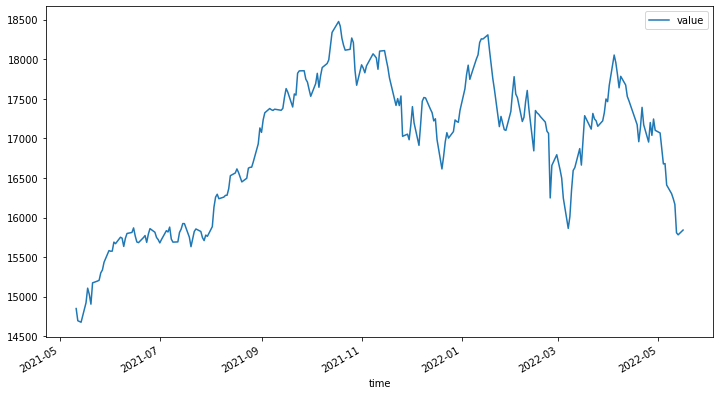

In [101]:
#plot current data
%matplotlib inline
#Must pass the name of the value columns to plot
df_ts.plot(cols=['value'])
plt.show()

In [102]:
#convert to pandas.DataFrame 
df_ts.to_dataframe().tail()

,time,value
247,2022-05-10,16240.05
248,2022-05-11,16167.10
249,2022-05-12,15808.00
250,2022-05-13,15782.15
251,2022-05-16,15842.30


In [103]:
#convert to numpy.ndarray
df_ts.to_array()[0:5]

array([[Timestamp('2021-05-11 00:00:00'), 14850.75],
       [Timestamp('2021-05-12 00:00:00'), 14696.5],
       [Timestamp('2021-05-14 00:00:00'), 14677.8],
       [Timestamp('2021-05-17 00:00:00'), 14923.15],
       [Timestamp('2021-05-18 00:00:00'), 15108.1]], dtype=object)

In [104]:
df_ts.is_empty()

False

In [105]:
df_ts.is_univariate()

True

In [106]:
##import the param and model classes for Prophet, then LSTM model.

##REF LINK-https://towardsdatascience.com/kats-a-generalizable-framework-to-analyze-time-series-data-in-python-3c8d21efe057

from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.lstm import LSTMForecast, LSTMParams, LSTMModel

## 1 st Method >> Facebook Prophet  #Results -Not Up to Mark
# params = ProphetParams(seasonality_mode='multiplicative')
# m = ProphetModel(df_ts, params)
# m.fit()
# fcst = m.predict(steps=10,freq = "B")  

##Take 15 mins to build the model
## 2 nd Method >> LSTM #Results- Good
##create a model param instance
params = LSTMParams(hidden_size=125,time_window=25,num_epochs=250) #hidden,time_window,epoch
#create a prophet model instance
m=LSTMModel(df_ts, params) 
#fit model simply by calling m.fit()
m.fit() 
#make prediction for next 0-24GMT (96 M15 periods)
fcst = m.predict(steps=10,freq="B")  #Forecasting for next 10 Business Day's, Saturday and Sunday will get eliminated as Nifty 50 Index is closed on Weekends4


##Holt Winter ALGO supported by KATS > 3 rd Method. Results>> Good, Test HW using statsmodels library
##Documentation - https://facebookresearch.github.io/Kats/api/kats.models.holtwinters.html
# from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
# import warnings
# warnings.simplefilter(action='ignore')

# params = HoltWintersParams(
#             trend="mul",
#             seasonal="mul",
#             seasonal_periods=50,
#         )
# m = HoltWintersModel(
#     data=ts, 
#     params=params)

# m.fit()
# ## steps == seasonality periods, in Financial Data seasonality is not contant so it's difficult to set particular number.
# ## alpha is confidence interval ranging between 0 to 1
# fcst = m.predict(steps=30, alpha = 0.1)
# m.plot()

In [107]:
#Forecasted Data
fcst.head(100)

,time,fcst,fcst_lower,fcst_upper
0,2022-05-17,15951.287584,15153.723205,16748.851964
1,2022-05-18,16020.467035,15219.443683,16821.490387
2,2022-05-19,16241.502236,15429.427124,17053.577348
3,2022-05-20,16314.113468,15498.407794,17129.819141
4,2022-05-23,16247.930216,15435.533706,17060.326727
5,2022-05-24,16195.963341,15386.165174,17005.761508
6,2022-05-25,16210.781346,15400.242279,17021.320414
7,2022-05-26,16343.003882,15525.853688,17160.154076
8,2022-05-27,16425.000569,15603.750540,17246.250597
9,2022-05-30,16487.897847,15663.502954,17312.292739


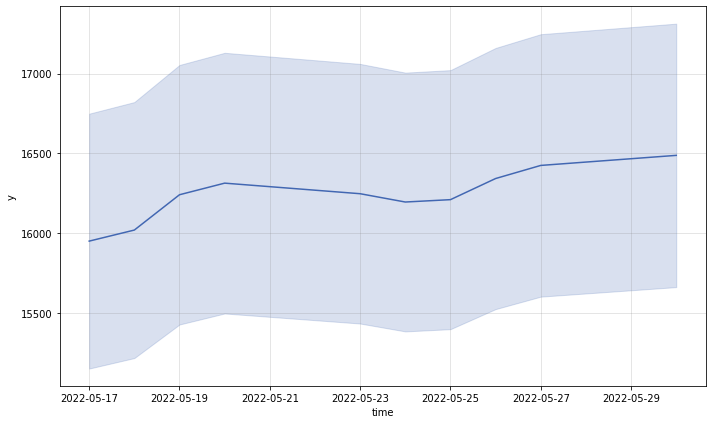

In [108]:
m.plot()
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# fig = m.plot()
# plt.xlim('2021-01-05','2021-12-06')
# plt.ylim(15000,20000)

In [109]:
fcst = fcst.set_index('time')
# df = df.set_index('Date')
fcst

,fcst,fcst_lower,fcst_upper
time,,,
2022-05-17,15951.287584,15153.723205,16748.851964
2022-05-18,16020.467035,15219.443683,16821.490387
2022-05-19,16241.502236,15429.427124,17053.577348
2022-05-20,16314.113468,15498.407794,17129.819141
2022-05-23,16247.930216,15435.533706,17060.326727
2022-05-24,16195.963341,15386.165174,17005.761508
2022-05-25,16210.781346,15400.242279,17021.320414
2022-05-26,16343.003882,15525.853688,17160.154076
2022-05-27,16425.000569,15603.750540,17246.250597


In [145]:
import plotly.graph_objects as go

fcst['fcst'] = fcst['fcst'].round(decimals = 2)
fcst['fcst_lower'] = fcst['fcst_lower'].round(decimals = 2)
fcst['fcst_upper'] = fcst['fcst_upper'].round(decimals = 2)

# Create traces
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst'],name = 'Forecast Data'))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_lower'],name = 'Lower Forecast Band',line_color = 'red',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_upper'],name = 'Upper Forecast Band',line_color = 'green',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=df.index, y=df.Close,mode='lines+markers',name='Actual Data'))

#https://plotly.com/python/continuous-error-bars/

fig = go.Figure([
    go.Scatter(
        name='Forecast Data',
        x=fcst.index,
        y=fcst['fcst'],
        mode='lines+markers',
        line=dict(color='rgb(50, 119, 180)'),
    ),
    go.Scatter(
        name='Actual Data',
        x=df_close['time'],
        y=df_close['value'],
        mode='lines+markers',
        fill='tonexty',
        line=dict(color='blue'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=fcst.index,
        y=fcst['fcst_upper'],
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        marker=dict(color="green"),
        line=dict(width=1.5),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=fcst.index,
        y=fcst['fcst_lower'],
        marker=dict(color="red"),
        line=dict(width=1.5),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])

#Omitting Test Data, Testing Forcasting Model on Complete Data instead Training Dataset
# fig.add_trace(go.Scatter(x=test_data.index, y=test_data.Close,mode='lines+markers', name='Test Data')) 

fig.update_layout(title='Nifty50 Last 1 Year Chart with Actual and Forecasted Data using KATS Algo',yaxis_title='Nifty 50',yaxis_tickformat= "000")
fig.update_traces( hovertemplate=None)
# fig.update_layout(hovermode="x")
fig.update_layout(hovermode="x unified")

fig.update_layout( xaxis_tickformat = ' %d %B (%a) %Y')
fig.show()

#Converting viz into HTML file,  ipynb file is not showing VIZ after uploading on Github
# pio.write_html(fig, file='Nifty50 Last 1 Year Chart with Actual and Forecasted Data using KATS Algo.html', auto_open=True)

#Visit below URL Page to Check VIZ-
#https://divyankm.github.io/Stock-Exchange-Data-Analysis/Nifty50%20Last%201%20Year%20Chart%20with%20Actual%20and%20Forecasted%20Data%20using%20KATS%20Algo.html

##ipynb file is not showing VIZ after uploading on Github, Visit Webpage for interactive viz.


##Webpage-
https://divyankm.github.io/Stock-Exchange-Data-Analysis/Nifty50%20Last%201%20Year%20Chart%20with%20Actual%20and%20Forecasted%20Data%20using%20KATS%20Algo.html

##Snap-

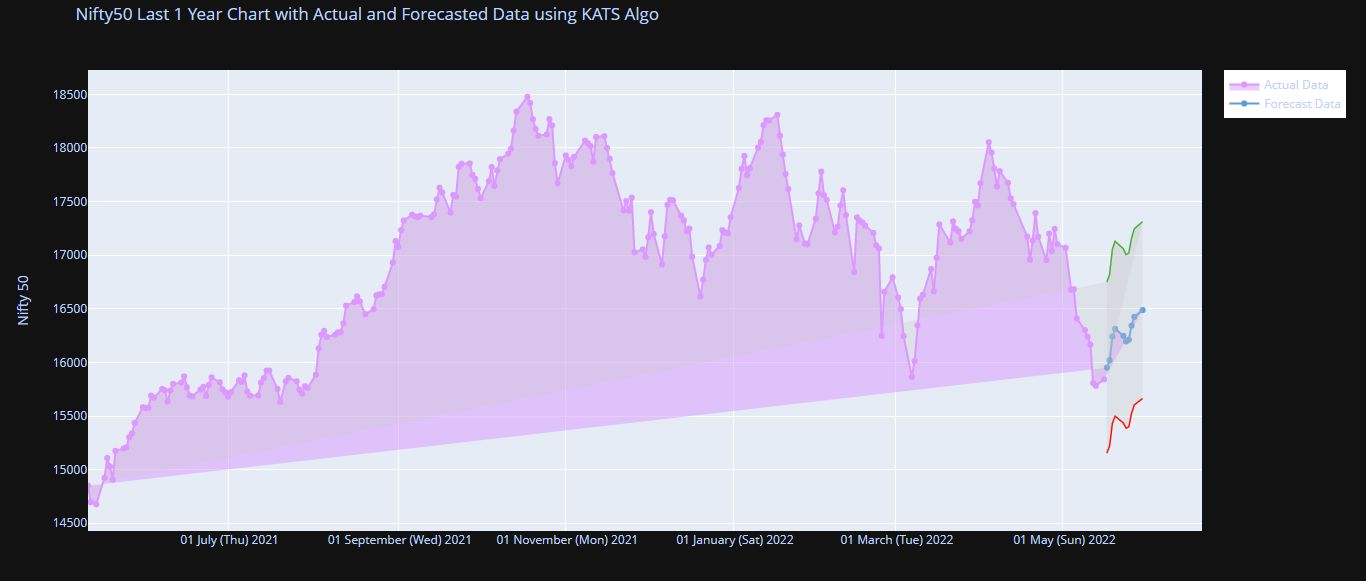

##USD/INR Currency Pair Forecasting Example


In [113]:
#Extracting Last 1 year data of NF using investpy library to pandas dataframe
today = datetime.now()
today = today.strftime("%d/%m/%Y")
one_year= datetime.today() - timedelta(days=370)
one_year = one_year.strftime("%d/%m/%Y")

usd_inr = investpy.get_currency_cross_historical_data(currency_cross='USD/INR', from_date=one_year, to_date=today)
usd_inr.head()

,Open,High,Low,Close,Currency
Date,,,,,
2021-05-11,73.503,73.540,73.280,73.375,INR
2021-05-12,73.379,73.541,73.371,73.538,INR
2021-05-13,73.611,73.662,73.470,73.480,INR
2021-05-14,73.450,73.486,73.189,73.300,INR
2021-05-17,73.281,73.335,73.151,73.335,INR


In [114]:
#import data file
# header = ["date","time","value"]
# df = pd.read_csv("EURUSD1440.csv", usecols=range(0,3), names=header)

In [115]:
#check data info
usd_inr.info()

usd_inr.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2021-05-11 to 2022-05-16
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      266 non-null    float64
 1   High      266 non-null    float64
 2   Low       266 non-null    float64
 3   Close     266 non-null    float64
 4   Currency  266 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.5+ KB


DatetimeIndex(['2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-24',
               ...
               '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-15', '2022-05-16'],
              dtype='datetime64[ns]', name='Date', length=266, freq=None)

In [116]:
#pd.to_datetime
usd_inr.reset_index(inplace = True)
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      266 non-null    datetime64[ns]
 1   Open      266 non-null    float64       
 2   High      266 non-null    float64       
 3   Low       266 non-null    float64       
 4   Close     266 non-null    float64       
 5   Currency  266 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 12.6+ KB


In [117]:
#show pd.datetime applied
usd_inr_close = usd_inr[["Date","Close"]]
usd_inr_close

,Date,Close
0,2021-05-11,73.375
1,2021-05-12,73.538
2,2021-05-13,73.480
3,2021-05-14,73.300
4,2021-05-17,73.335
...,...,...
261,2022-05-11,77.410
262,2022-05-12,77.420
263,2022-05-13,77.470
264,2022-05-15,77.487


In [118]:
#Adding 'time' and 'value' column in Dataframe as Columne name "Close" and "Date" is not working in Algo

usd_inr_close["time"] = usd_inr_close['Date']
usd_inr_close["value"] = usd_inr_close['Close']
del usd_inr_close["Date"]
del usd_inr_close["Close"]
usd_inr_close.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,value
0,2021-05-11,73.375
1,2021-05-12,73.538
2,2021-05-13,73.480
3,2021-05-14,73.300
4,2021-05-17,73.335


In [119]:
#construct TimeSeriesData object for each time series
df_ts_usd_inr = TimeSeriesData(usd_inr_close)
print(type(df_ts_usd_inr.time))
print(type(df_ts_usd_inr.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [120]:
df_ts_usd_inr

,time,value
0,2021-05-11,73.375
1,2021-05-12,73.538
2,2021-05-13,73.480
3,2021-05-14,73.300
4,2021-05-17,73.335
...,...,...
261,2022-05-11,77.410
262,2022-05-12,77.420
263,2022-05-13,77.470
264,2022-05-15,77.487


In [121]:
# #plot current data
# %matplotlib inline
# #Must pass the name of the value columns to plot
# df_ts_usd_inr(cols=['value'])
# plt.show()

In [122]:
#examples below in case needed in the future

In [123]:
#convert to pandas.DataFrame 
df_ts_usd_inr.to_dataframe().tail()

,time,value
261,2022-05-11,77.410
262,2022-05-12,77.420
263,2022-05-13,77.470
264,2022-05-15,77.487
265,2022-05-16,77.855


In [124]:
#convert to numpy.ndarray
df_ts_usd_inr.to_array()[0:5]

array([[Timestamp('2021-05-11 00:00:00'), 73.375],
       [Timestamp('2021-05-12 00:00:00'), 73.538],
       [Timestamp('2021-05-13 00:00:00'), 73.48],
       [Timestamp('2021-05-14 00:00:00'), 73.3],
       [Timestamp('2021-05-17 00:00:00'), 73.335]], dtype=object)

In [125]:
df_ts_usd_inr.is_empty()

False

In [126]:
df_ts_usd_inr.is_univariate()

True

In [127]:
#import the param and model classes for Prophet, then LSTM model.
from kats.models.prophet import ProphetModel, ProphetParams
from kats.models.lstm import LSTMForecast, LSTMParams, LSTMModel

##Method 1 - Facebook Prophet
# params = ProphetParams(seasonality_mode='multiplicative')
# m = ProphetModel(df_ts_usd_inr, params)
# m.fit()
# fcst = m.predict(steps=24)


###Method -2 LSTM , Takes 15 mins to Build and Forecast
#create a model param instance
params = LSTMParams(hidden_size=125,time_window=25,num_epochs=250) #hidden,time_window,epoch
#create a prophet model instance
m=LSTMModel(df_ts_usd_inr, params) 
#fit model simply by calling m.fit()
m.fit() 
#make prediction for next 0-24GMT (96 M15 periods)
fcst_usd_inr = m.predict(steps=24)

In [128]:
fcst_usd_inr.head(100)

,time,fcst,fcst_lower,fcst_upper
0,2022-05-17,77.920559,74.024531,81.816587
1,2022-05-18,78.311989,74.396389,82.227588
2,2022-05-19,78.444545,74.522317,82.366772
3,2022-05-20,78.998350,75.048433,82.948268
4,2022-05-21,79.080313,75.126298,83.034329
5,2022-05-22,79.637713,75.655827,83.619599
6,2022-05-23,79.927127,75.930770,83.923483
7,2022-05-24,80.537703,76.510818,84.564588
8,2022-05-25,80.946343,76.899026,84.993660
9,2022-05-26,81.517293,77.441428,85.593158


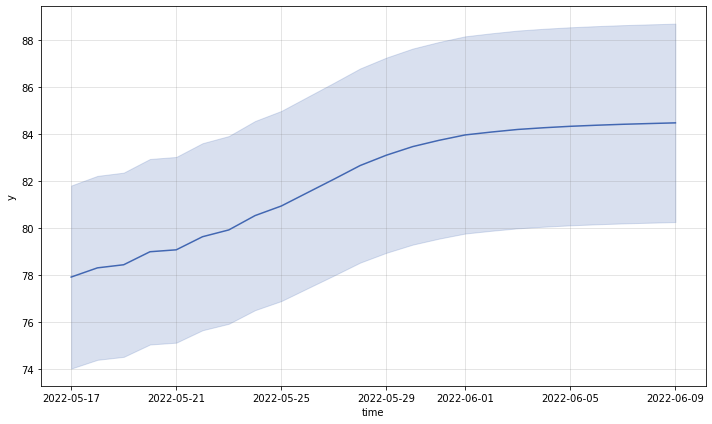

In [129]:
m.plot()
# pd.plotting.register_matplotlib_converters()
# %matplotlib inline

# fig = m.plot()
# plt.xlim('2021-01-05 00:00:00','2021-12-06 12:00:00')
# plt.ylim(1.16,1.23)

In [131]:
fcst_usd_inr = fcst_usd_inr.set_index('time')
# df = df.set_index('Date')
fcst_usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-05-17 to 2022-06-09
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fcst        24 non-null     float64
 1   fcst_lower  24 non-null     float64
 2   fcst_upper  24 non-null     float64
dtypes: float64(3)
memory usage: 768.0 bytes


In [146]:
import plotly.graph_objects as go

# fcst_usd_inr['fcst'] = fcst_usd_inr['fcst'].round(decimals = 3)
# fcst_usd_inr['fcst_lower'] = fcst_usd_inr['fcst_lower'].round(decimals = 3)
# fcst_usd_inr['fcst_upper'] = fcst_usd_inr['fcst_upper'].round(decimals = 3)

# Create traces
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst'],name = 'Forecast Data'))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_lower'],name = 'Lower Forecast Band',line_color = 'red',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=fcst.index, y=fcst['fcst_upper'],name = 'Upper Forecast Band',line_color = 'green',line = {'dash': 'dash'},opacity = 0.5))
# fig.add_trace(go.Scatter(x=df.index, y=df.Close,mode='lines+markers',name='Actual Data'))

#https://plotly.com/python/continuous-error-bars/

fig = go.Figure([
    go.Scatter(
        name='Forecast Data',
        x=fcst_usd_inr.index,
        y=fcst_usd_inr['fcst'],
        mode='lines+markers',
        line=dict(color='rgb(50, 119, 180)'),
    ),
    go.Scatter(
        name='Actual Data',
        x=usd_inr_close['time'],
        y=usd_inr_close['value'],
        mode='lines+markers'
    ),
    go.Scatter(
        name='Upper Bound',
        x=fcst_usd_inr.index,
        y=fcst_usd_inr['fcst_upper'],
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        marker=dict(color="green"),
        line=dict(width=1.5),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=fcst_usd_inr.index,
        y=fcst_usd_inr['fcst_lower'],
        marker=dict(color="red"),
        line=dict(width=1.5),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])

#Omitting Test Data, Testing Forcasting Model on Complete Data instead Training Dataset
# fig.add_trace(go.Scatter(x=test_data.index, y=test_data.Close,mode='lines+markers', name='Test Data')) 

fig.update_layout(title='USD/INR_Last_1_Year_Chart_with_Actual_and_Forecasted)Data_using_KATS(LSTM)Algo',yaxis_title='USD/INR')
fig.update_traces( hovertemplate=None)
# fig.update_layout(hovermode="x")
fig.update_layout(hovermode="x unified")

fig.update_layout( xaxis_tickformat = ' %d %B (%a) %Y')
fig.show()

#Converting viz into HTML file , ipynb file is not showing VIZ after uploading on Github
# pio.write_html(fig, file='USD_INR Last 1 Year Chart with Actual and Forecasted Data using KATS Algo.html', auto_open=True)

#Visit below URL Page to Check VIZ-
#https://divyankm.github.io/Stock-Exchange-Data-Analysis/USD_INR%20Last%201%20Year%20Chart%20with%20Actual%20and%20Forecasted%20Data%20using%20KATS%20Algo.html

##ipynb file is not showing VIZ after uploading on Github, Visit Webpage for interactive viz.

Webpage-https://divyankm.github.io/Stock-Exchange-Data-Analysis/USD_INR%20Last%201%20Year%20Chart%20with%20Actual%20and%20Forecasted%20Data%20using%20KATS%20Algo.html

Snap-

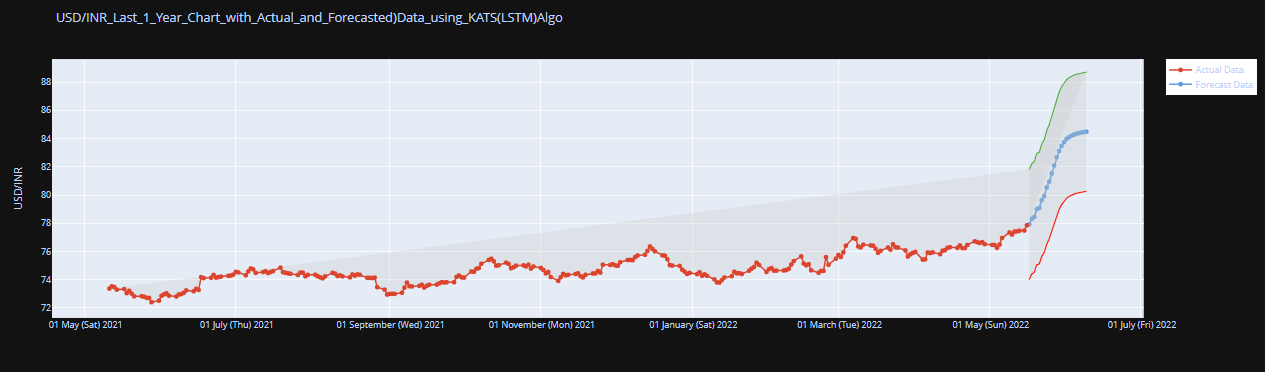

In [140]:
# #try CUSUM
# import numpy as np

# from kats.consts import TimeSeriesData
# from kats.detectors.cusum_detection import CUSUMDetector

# #changepoints
# change_points = CUSUMDetector(eurusd15_ts).detector()
# change_points.plot()
 

In [ ]:
#do the below after ensemble

In [ ]:
# #preprocessing complete, start model
# from kats.consts import TimeSeriesData
# eurusd15_ts = TimeSeriesData(eurusd15_df)

In [ ]:
# #GetMetaData
# from kats.models.metalearner.get_metadata import GetMetaData
# MD = GetMetaData(data = eurusd15_ts)